# Variadic lines in `geom_path()` and `geom_line()`

Using the `size` and `color` aesthetics in a mapping now produces lines with variadic width and color even within a particular group. 

In [1]:
import pandas as pd

from lets_plot import *
from lets_plot.mapping import as_discrete


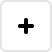
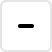
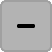
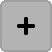
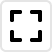
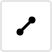
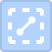
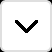
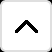
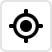

In [2]:
LetsPlot.setup_html()

In [3]:
airquality = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/airquality.csv")
airquality.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,NaN,NaN,14.3,56,5,5


Let's use `size` mapping to visualize even more data on a plot:

In [4]:
ggplot(airquality) \
    + geom_line(aes(x = 'Day', y = 'Temp', size = 'Wind', color = as_discrete('Month'))) \
    + scale_size([0.5, 5.0]) \
    + ggsize(700, 500)

`color` mapping can also be used to visualize more data on a single plot:

In [5]:
ggplot(airquality) \
    + geom_line(aes(x = 'Day', y = 'Temp', color = 'Wind', group = 'Month'), size=2) \
    + scale_color_gradient(low='#1a9641', high='#d7191c') \
    + ggsize(700, 500)

Both `size` and `color` aesthetics can be used together to make a plot even more expressive:

In [6]:
ggplot(airquality) \
    + geom_line(aes(x = 'Day', y = 'Temp', size = 'Wind', color = 'Wind', group = 'Month')) \
    + scale_size([0.5, 6.0]) \
    + scale_color_gradient(low='#1a9641', high='#d7191c') \
    + ggsize(700, 500)

### Variadic lines and interactive maps
The map of Napoleon's Russian campaign  
See: https://en.wikipedia.org/wiki/Charles_Joseph_Minard#The_map_of_Napoleon's_Russian_campaign

In [7]:
minard = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Minard.troops.csv')
minard.head()

,Unnamed: 0,long,lat,survivors,direction,group
0,1,24.0,54.9,340000,A,1
1,2,24.5,55.0,340000,A,1
2,3,25.5,54.5,340000,A,1
3,4,26.0,54.7,320000,A,1
4,5,27.0,54.8,300000,A,1


In [8]:
ggplot(minard) \
    + geom_livemap() \
    + geom_path(aes(x='long', y='lat', size='survivors', group='group', color='direction')) \
    + scale_size([1.0, 20.0])